In [27]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, norm

In [28]:
# Load the Excel file and process data
file_path = 'CarHoods10k_organized (1).xlsx'
sheet_name_X = 'Consolidated'
sheet_name_Y = 'Performance'
df1 = pd.read_excel(file_path, sheet_name=sheet_name_X)
df2 = pd.read_excel(file_path, sheet_name=sheet_name_Y)

In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler




# Split into X (columns A to S) and y (columns W, X, Y)
X = df1.iloc[:, 0:20]  # A to S are columns 0 to 18
y = df2.iloc[:, 2:5]  # W, X, Y are columns 23 to 25

# Initialize the scalers
scaler_X = StandardScaler()
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Standardize the input (X)
X_scaled = scaler_X.fit_transform(X)

# Scale the output (y) between 0 and 1
y_scaled = scaler_y.fit_transform(y)

# Get the column names for X and y
X_columns = X.columns.tolist()
y_columns = y.columns.tolist()

print("X columns:", X_columns)
print("y columns:", y_columns)

# Optionally, you can convert the scaled data back into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_columns)
y_scaled_df = pd.DataFrame(y_scaled, columns=y_columns)

# Output the scaled data (if needed)
print("Scaled X:")
print(X_scaled_df.head())

print("Scaled y:")
print(y_scaled_df.head())




X columns: ['Skin', 'OutputNumber', 'MiddleRibWidth', 'AngledRibWidth', 'RearRibWidth', 'RibDepth', 'Pocket1_Radius', 'Pocket1_Offset', 'Pocket2_Radius', 'Pocket2_Offset', 'Pocket3_Radius', 'Pocket3_Offset', 'Pocket4_Radius', 'Pocket4_Offset', '1stSubsidiaryRibLength', '2ndSubsidiaryRibLength', 'SubsidiaryRibWidth', 'Cutout1 on/off', 'Cutout2 on/off', 'Scaling']
y columns: ['Equivalent Stress Maximum (MPa) ', 'Geometry Mass (kg) ', 'Directional Deformation Maximum (mm) ']
Scaled X:
       Skin  OutputNumber  MiddleRibWidth  AngledRibWidth  RearRibWidth  \
0 -0.602262     -1.747123       -0.278363       -0.391154      1.531307   
1 -0.602262     -1.712198        0.613146       -0.205533      1.963115   
2 -0.602262     -1.677272       -1.272738        0.536950      1.934328   
3 -0.602262     -1.642347        0.647435       -1.207885      1.099498   
4 -0.602262     -1.607421       -0.175496       -1.319258      1.099498   

   RibDepth  Pocket1_Radius  Pocket1_Offset  Pocket2_Radius  P

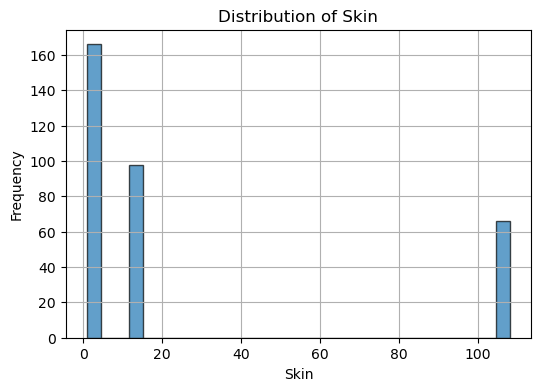

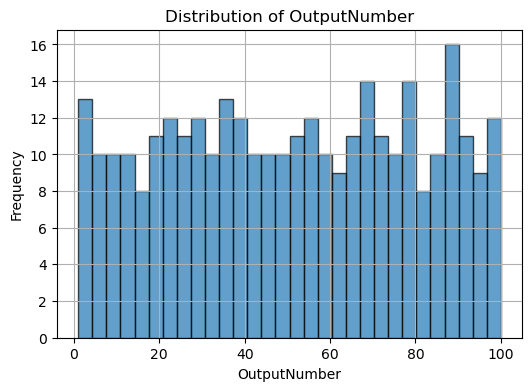

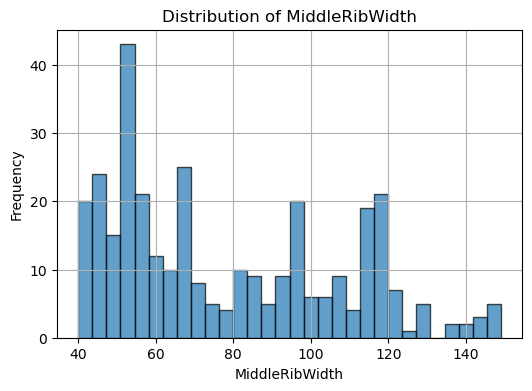

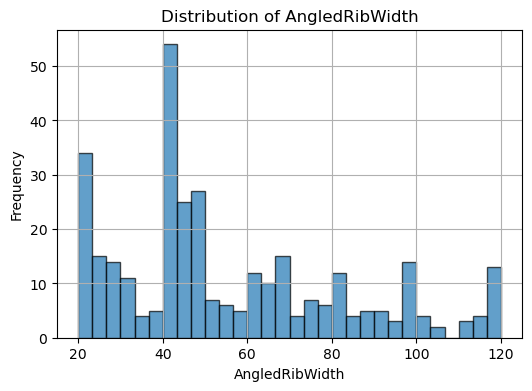

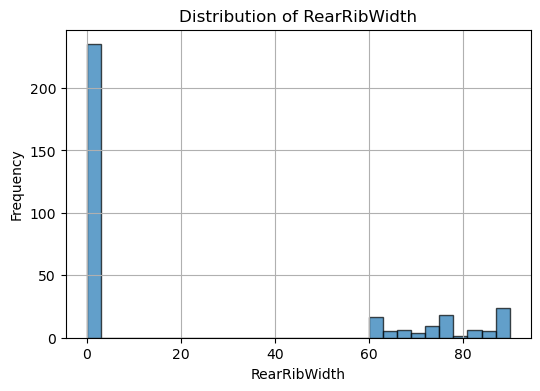

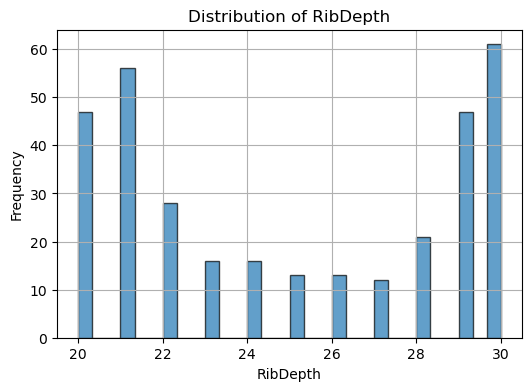

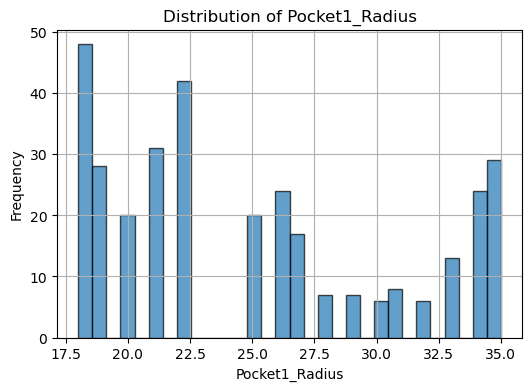

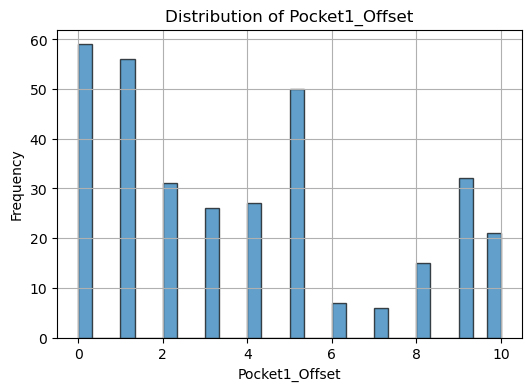

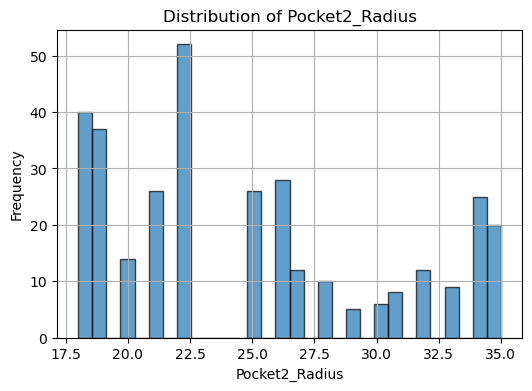

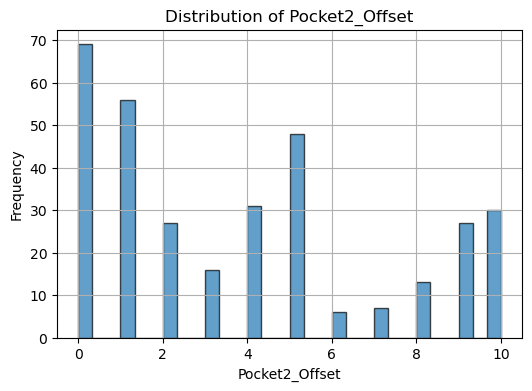

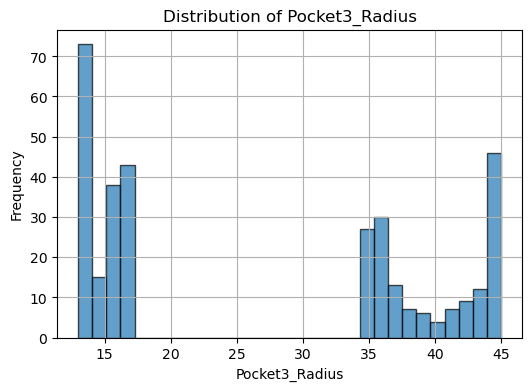

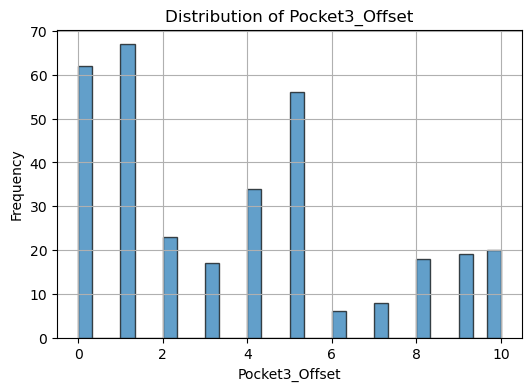

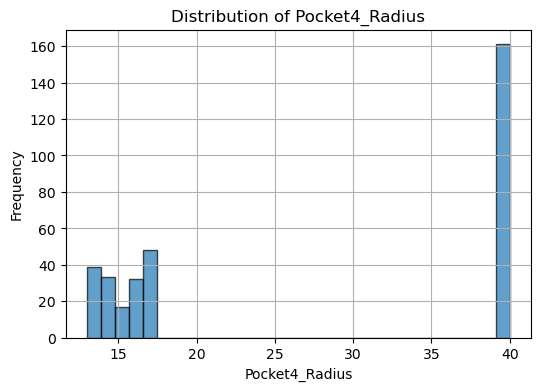

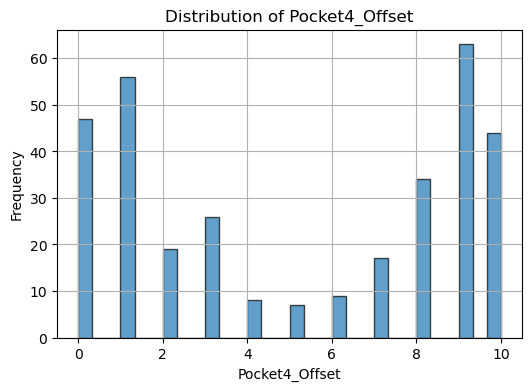

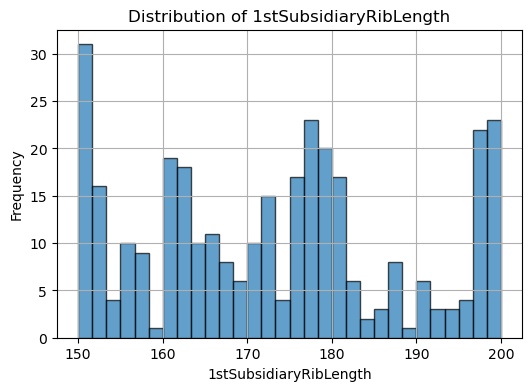

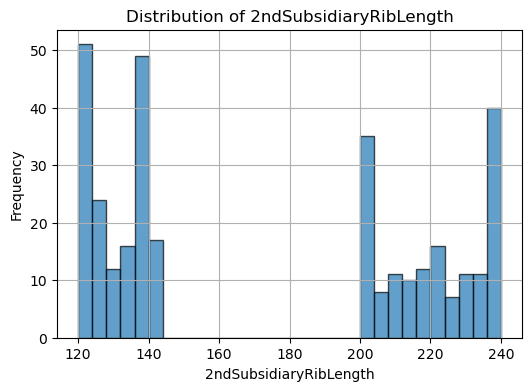

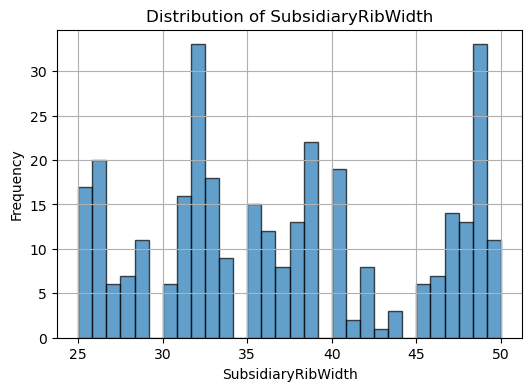

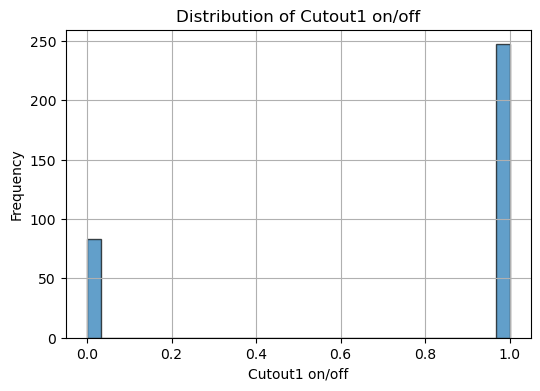

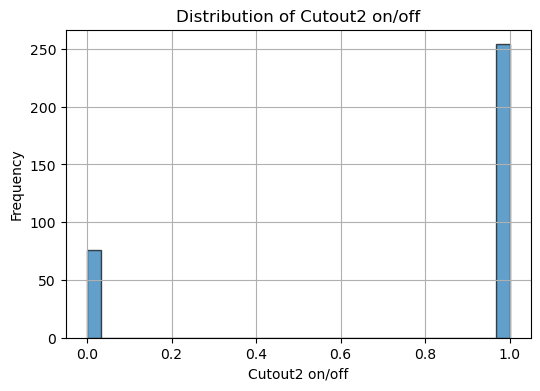

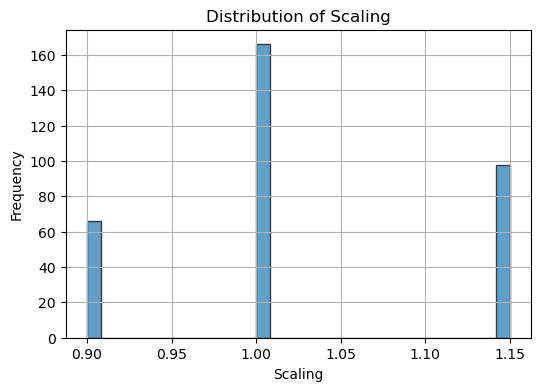

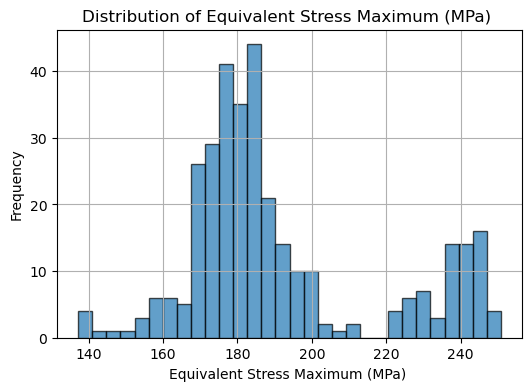

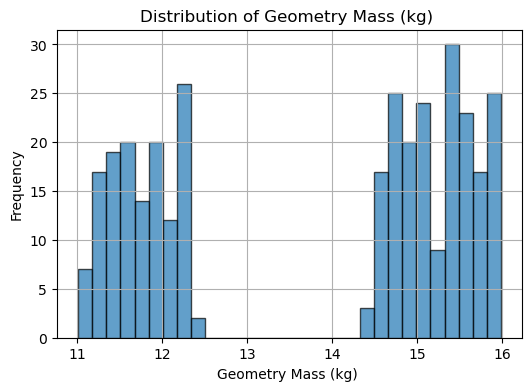

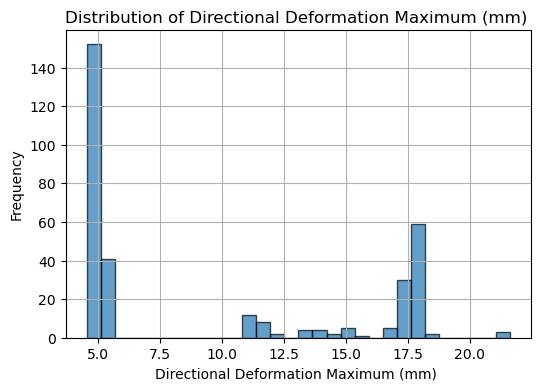

In [31]:
# Plot distribution for each column in X
for column in X.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(X[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot distribution for each column in y
for column in y.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(y[column].dropna(), bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

Training Loss (MSE): 22.620110477430117
Test Loss (MSE): 71.47221947196014


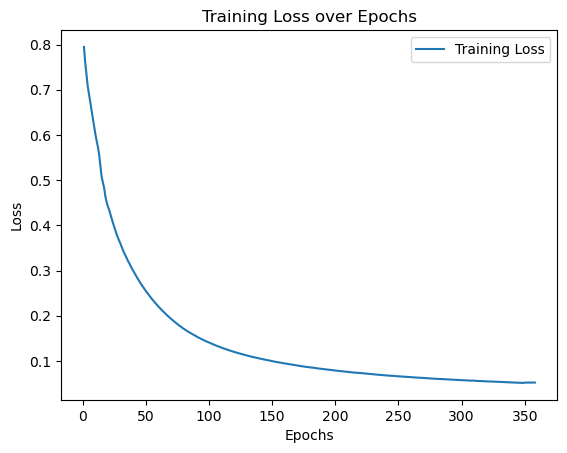

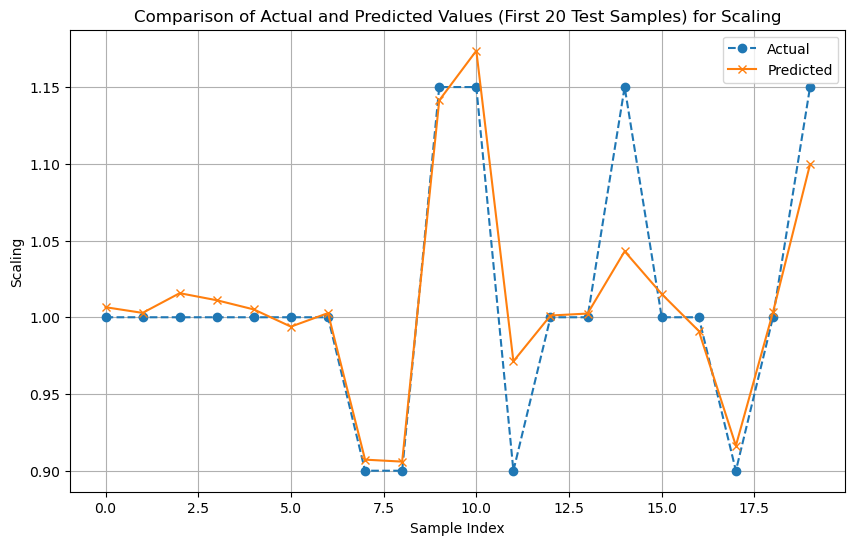

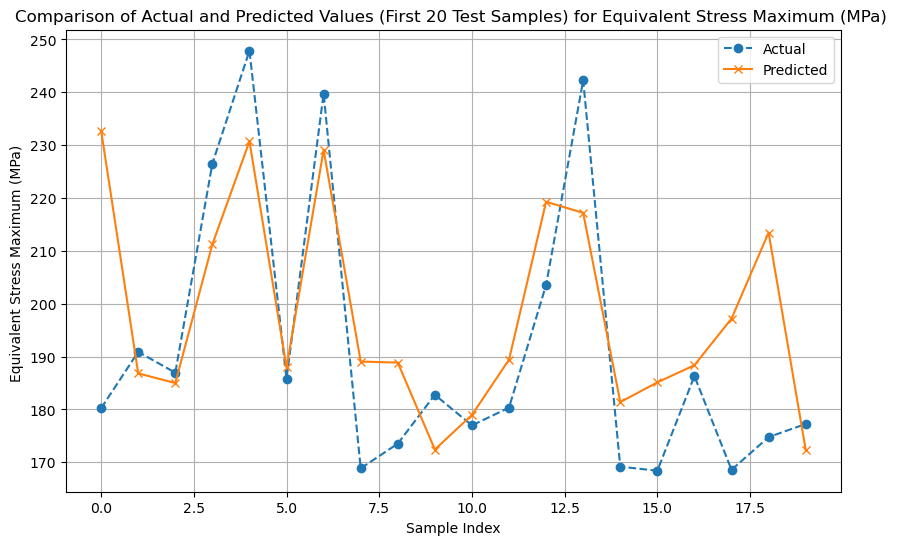

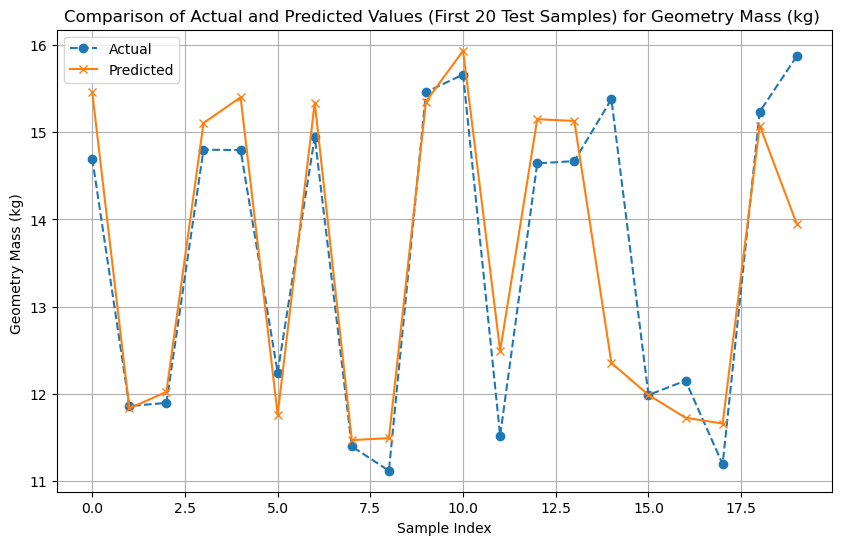

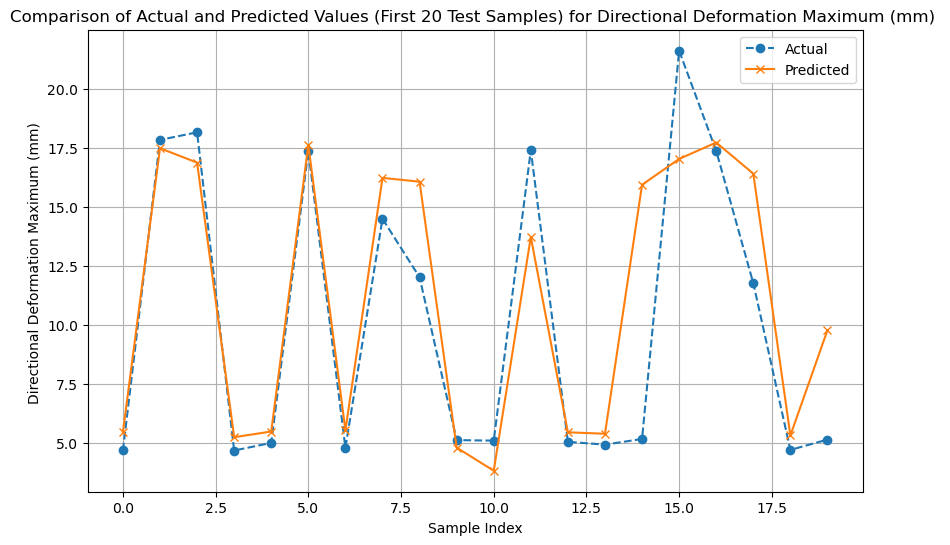

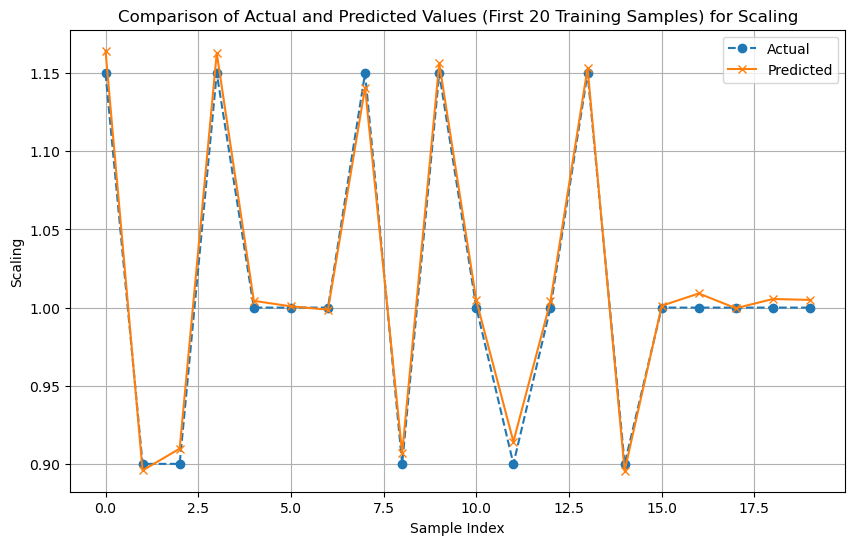

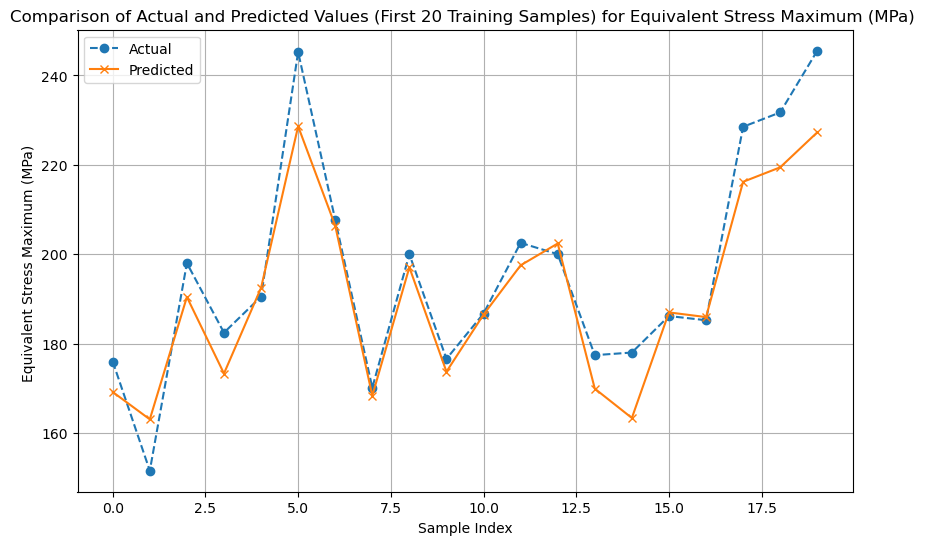

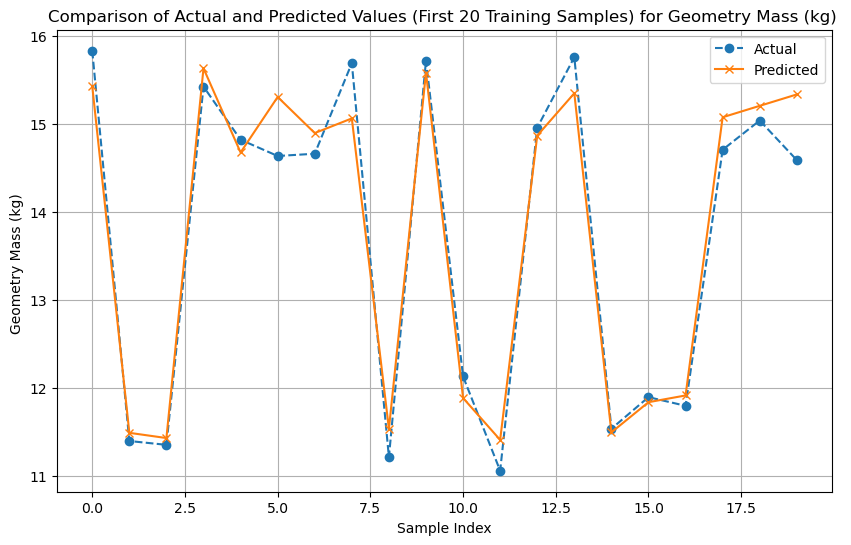

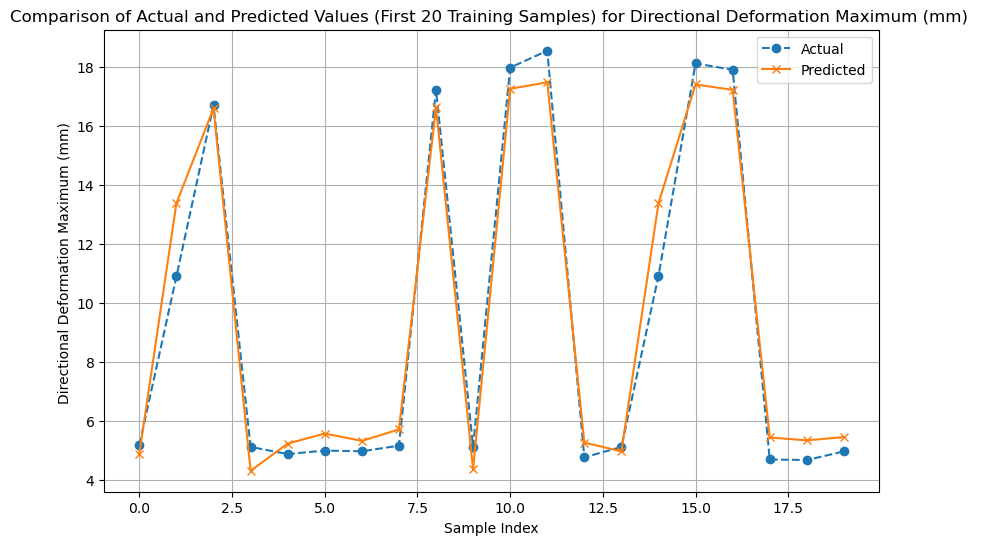

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error

# Clean the data by removing rows where any values in y are missing
data = pd.concat([X, y], axis=1)
data_cleaned = data.dropna()

# Split cleaned data into X and y
X_cleaned = data_cleaned.iloc[:, :19]  # Columns A to S
y_cleaned = data_cleaned.iloc[:, 19:]  # Columns W, X, Y

# Train-test split (90:10)
X_train, X_test, y_train, y_test = train_test_split(X_cleaned, y_cleaned, test_size=0.1, random_state=42)

# Feature scaling for input data
scaler_X = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# Scaling the output (y) between 0 and 1
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)

# Define and train the model
mlp = MLPRegressor(hidden_layer_sizes=(120, 120, 120, 120, 90, 90, 90, 60, 60, 30, 30, 9),
                   activation='relu',
                   solver='adam',
                   max_iter=1000000,
                   random_state=42,
                   alpha=0.2)  # L2 regularization strength


# Train the model
mlp.fit(X_train_scaled, y_train_scaled)

# Predictions and performance evaluation
y_train_pred_scaled = mlp.predict(X_train_scaled)
y_test_pred_scaled = mlp.predict(X_test_scaled)

# Inverse transform to get the actual scale of y
y_train_pred = scaler_y.inverse_transform(y_train_pred_scaled)
y_test_pred = scaler_y.inverse_transform(y_test_pred_scaled)

# Calculate Mean Squared Error
train_loss = mean_squared_error(y_train, y_train_pred)
test_loss = mean_squared_error(y_test, y_test_pred)

print(f"Training Loss (MSE): {train_loss}")
print(f"Test Loss (MSE): {test_loss}")

# Plot training loss over epochs
epochs = np.arange(1, len(mlp.loss_curve_) + 1)
plt.plot(epochs, mlp.loss_curve_, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()


# Plot first 20 predicted vs actual values for the test set
for i, col in enumerate(y_cleaned.columns):
    y_test_20 = y_test[col][:20].values
    y_test_pred_20 = y_test_pred[:20, i]  # Indexing the correct column for predictions

    plt.figure(figsize=(10, 6))
    plt.plot(y_test_20, label='Actual', marker='o', linestyle='--')
    plt.plot(y_test_pred_20, label='Predicted', marker='x', linestyle='-')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{col}')
    plt.title(f'Comparison of Actual and Predicted Values (First 20 Test Samples) for {col}')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot first 20 predicted vs actual values for the training set
for i, col in enumerate(y_cleaned.columns):
    y_train_20 = y_train[col][:20].values
    y_train_pred_20 = y_train_pred[:20, i]  # Indexing the correct column for predictions

    plt.figure(figsize=(10, 6))
    plt.plot(y_train_20, label='Actual', marker='o', linestyle='--')
    plt.plot(y_train_pred_20, label='Predicted', marker='x', linestyle='-')
    plt.xlabel('Sample Index')
    plt.ylabel(f'{col}')
    plt.title(f'Comparison of Actual and Predicted Values (First 20 Training Samples) for {col}')
    plt.legend()
    plt.grid(True)
    plt.show()  





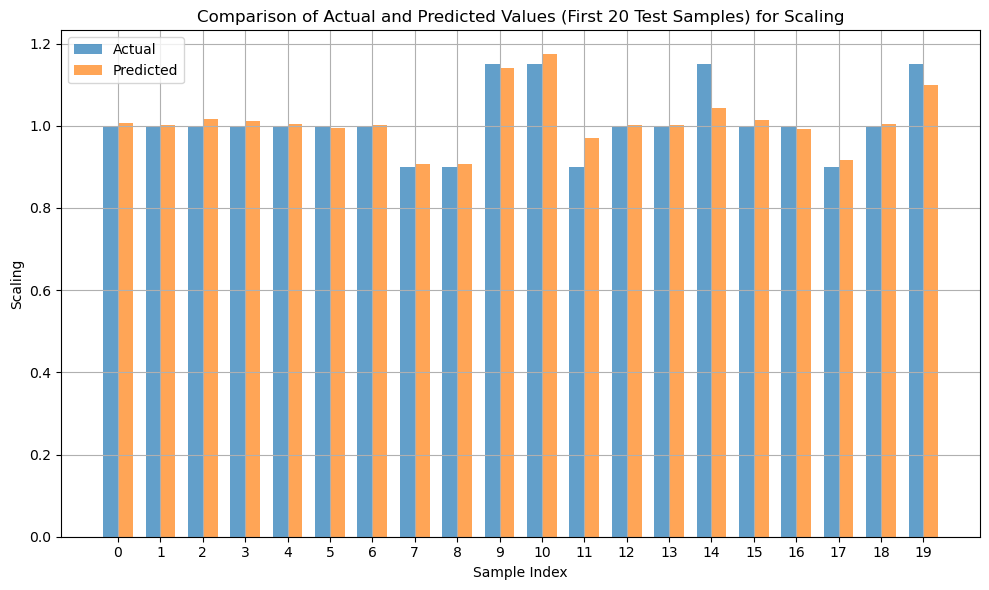

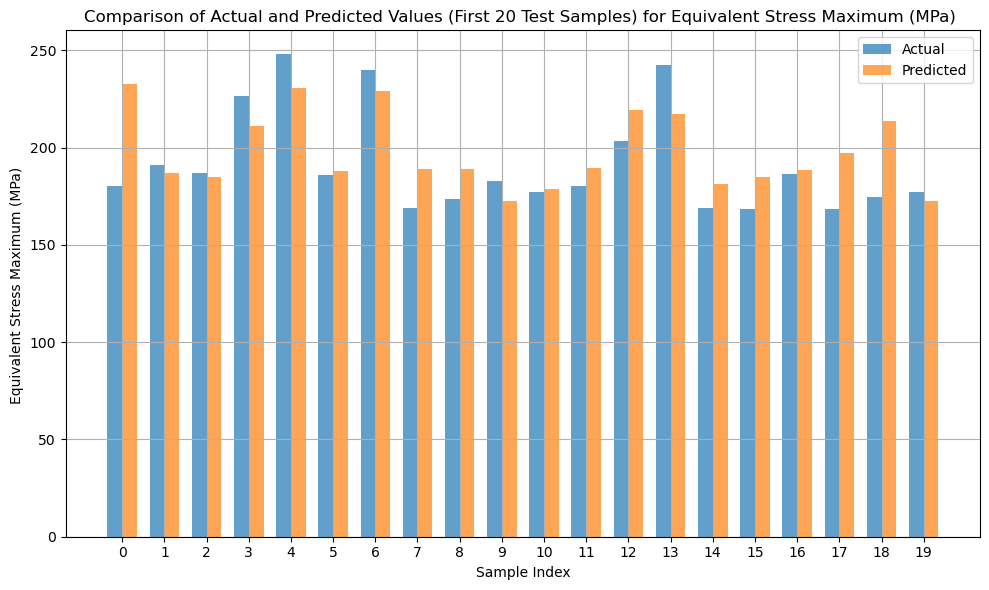

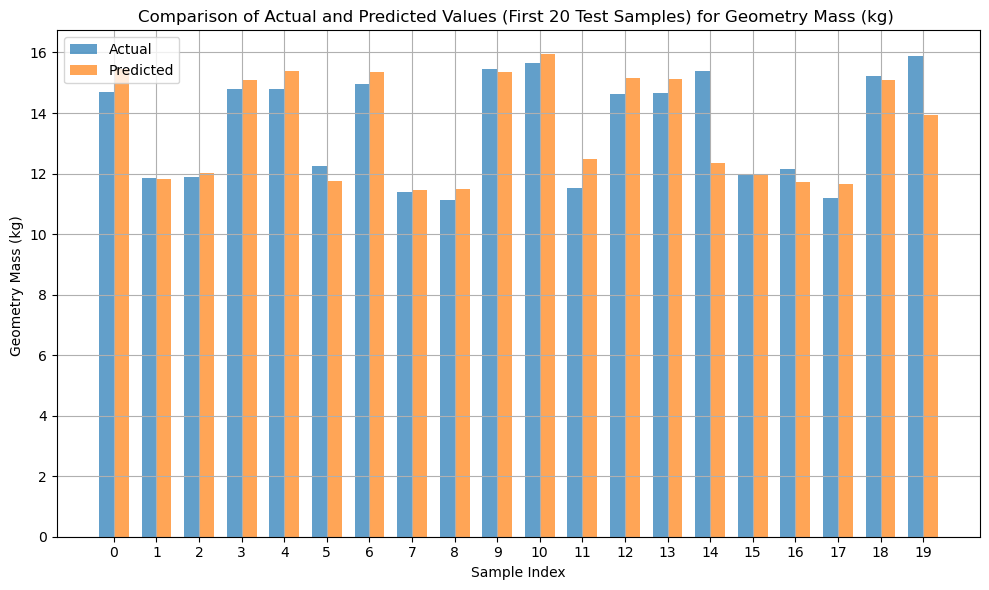

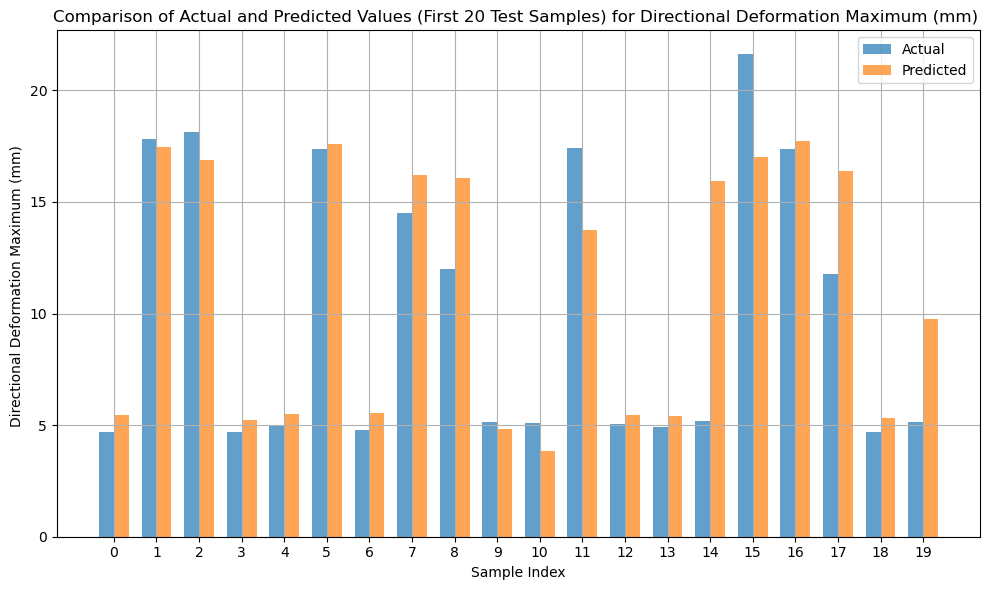

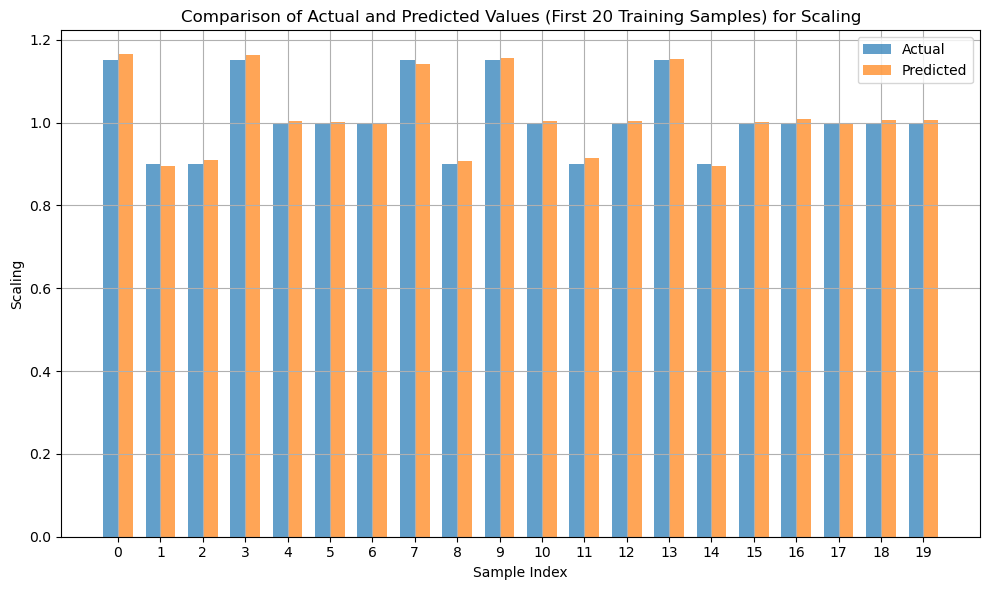

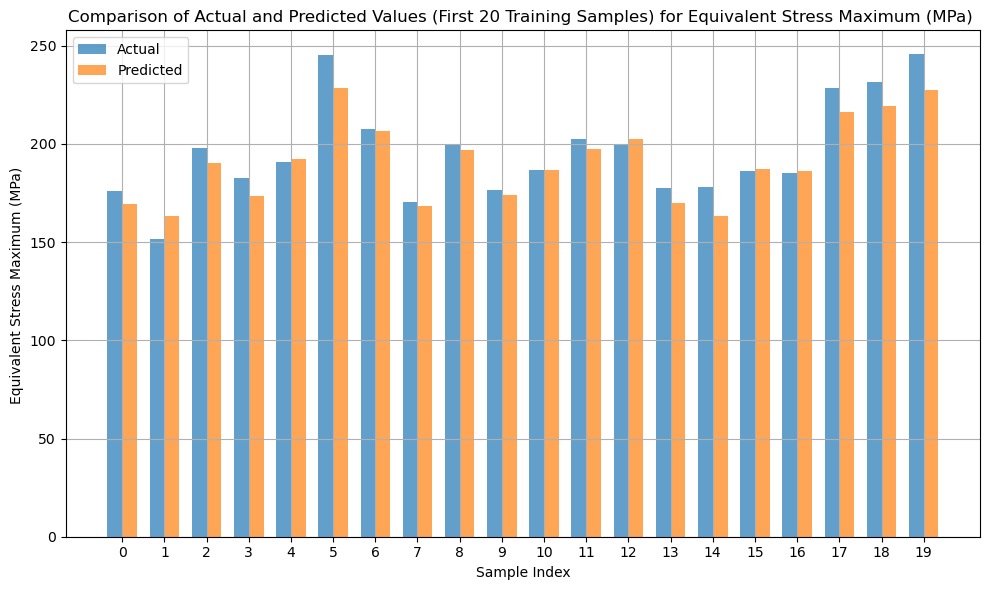

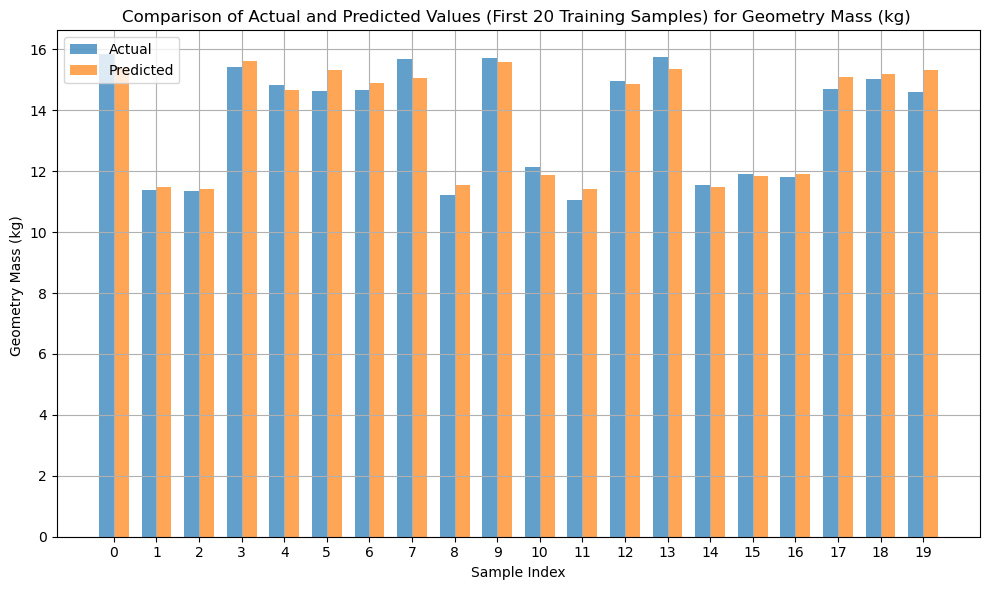

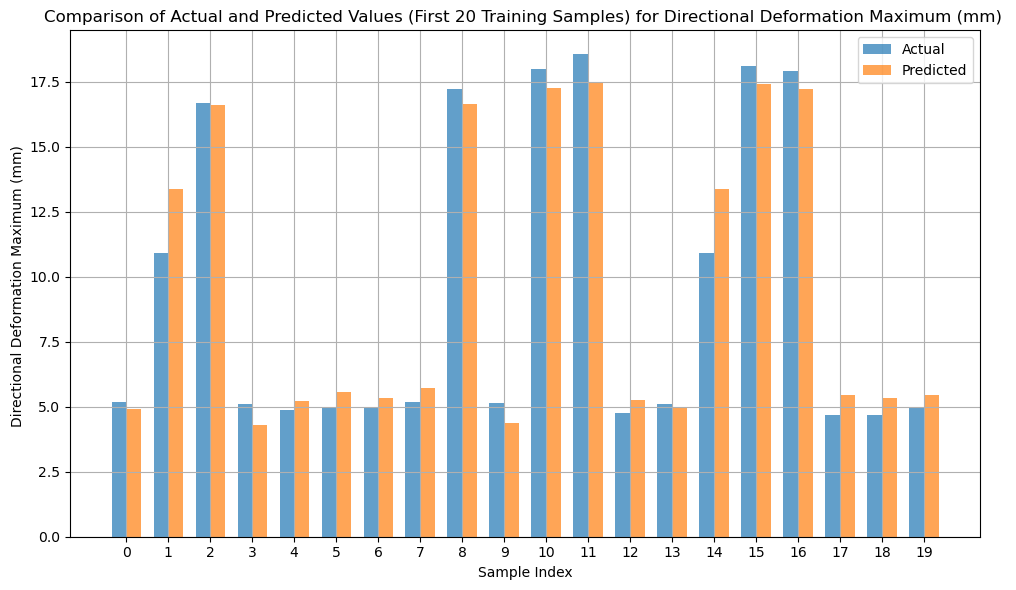

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Plot first 20 predicted vs actual values for the test set
for i, col in enumerate(y_cleaned.columns):
    y_test_20 = y_test[col][:20].values
    y_test_pred_20 = y_test_pred[:20, i]  # Indexing the correct column for predictions
    index = np.arange(len(y_test_20))  # Creating an index for each sample

    plt.figure(figsize=(10, 6))
    bar_width = 0.35  # Width of the bars

    # Plotting bars for actual and predicted values
    plt.bar(index, y_test_20, bar_width, label='Actual', alpha=0.7)
    plt.bar(index + bar_width, y_test_pred_20, bar_width, label='Predicted', alpha=0.7)

    # Labels and title
    plt.xlabel('Sample Index')
    plt.ylabel(f'{col}')
    plt.title(f'Comparison of Actual and Predicted Values (First 20 Test Samples) for {col}')
    plt.xticks(index + bar_width / 2, index)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot first 20 predicted vs actual values for the training set
for i, col in enumerate(y_cleaned.columns):
    y_train_20 = y_train[col][:20].values
    y_train_pred_20 = y_train_pred[:20, i]  # Indexing the correct column for predictions
    index_train = np.arange(len(y_train_20))

    plt.figure(figsize=(10, 6))

    # Plotting bars for actual and predicted values in the training set
    plt.bar(index_train, y_train_20, bar_width, label='Actual', alpha=0.7)
    plt.bar(index_train + bar_width, y_train_pred_20, bar_width, label='Predicted', alpha=0.7)

    # Labels and title
    plt.xlabel('Sample Index')
    plt.ylabel(f'{col}')
    plt.title(f'Comparison of Actual and Predicted Values (First 20 Training Samples) for {col}')
    plt.xticks(index_train + bar_width / 2, index_train)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
